# Titanic - Machine Learning from Disaster

## Decision Tree Model

In [1]:
import pandas as pd
import numpy as np

import functions_classifier as func

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "../data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,2,73,1,8,0,0
1,1,1,0,38.0,1,0,596,71.28,0,3,136,1,2,0,0
2,1,3,0,26.0,0,0,669,7.92,2,1,251,0,8,1,0
3,1,1,0,35.0,1,0,49,26.55,2,3,198,1,2,0,0
4,0,3,1,35.0,0,0,472,8.05,2,2,11,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,4,406,0,8,1,0
887,1,1,0,19.0,0,0,14,30.00,2,1,221,0,1,1,0
888,0,3,0,29.0,1,2,675,11.72,2,1,293,3,8,0,0
889,1,1,1,26.0,0,0,8,30.00,0,2,52,0,2,1,0


## Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]

X = scale(X)

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 14), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 14), (223,))

## Modeling

#### Building, train and predict model

In [21]:
decision_tree_classifier = DecisionTreeClassifier(
    criterion="entropy", 
    max_depth=6, 
    min_samples_split=4,
    splitter="random"
)

gradient_boosting_classifier_params =   {
    "criterion": "friedman_mse", 
    "learning_rate": 0.01, 
    "loss": "log_loss", 
    "max_depth": 3, 
    "min_samples_leaf": 3, 
    "min_samples_split": 2, 
    "n_estimators": 400
}
gradient_boosting_classifier = GradientBoostingClassifier(**gradient_boosting_classifier_params)


random_forest_classifier = {
    'criterion': 'entropy', 
    'max_depth': 9, 
    'n_estimators': 50
}

random_forest_classifier = RandomForestClassifier(**random_forest_classifier)

In [22]:
classifier = VotingClassifier(
    estimators=[
        ('DecisionTreeClassifier', decision_tree_classifier), 
        ('gradient_boosting_classifier', gradient_boosting_classifier), 
        ('random_forest_classifier', random_forest_classifier)],
    voting='hard')

classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

#### Predict and show model result

In [23]:
func.show_model_result(classifier, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.82122905 0.79213483 0.83146067 0.78089888 0.85955056]
Mean = 0.82 / Standard Deviation = 0.03

Confunsion Matrix
----------------------------------------------------------------------
[[118  16]
 [ 22  67]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       134
           1       0.81      0.75      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

----------------------------------------------------------------------
Accuracy: 0.83
Precicion: 0.83
Sensitivity aka Recall: 0.83
F1-Score: 0.83


#### Display Confusion Matrix

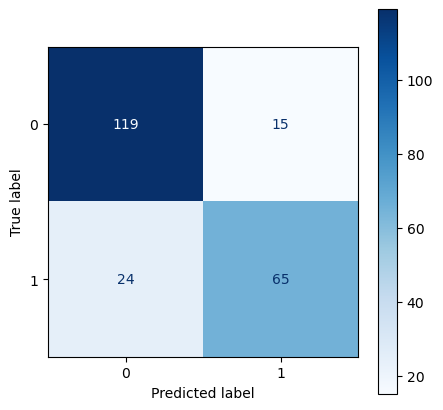

In [19]:
func.display_confusion_matrix(classifier, y_test, y_predict)